In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv('covid.csv')
data.head()

,age,body_temperature,chronic_disease,breathing_issue,Blood O2 Level in Percentage,Needed Hospitalization
0,10.0,Normal,no,no,97.0,No
1,12.0,Normal,no,no,97.0,No
2,15.0,Normal,no,no,94.0,No
3,10.0,Normal,no,no,97.0,No
4,13.0,Moderate,no,no,94.0,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           69 non-null     float64
 1   body_temperature              70 non-null     object 
 2   chronic_disease               70 non-null     object 
 3   breathing_issue               70 non-null     object 
 4   Blood O2 Level in Percentage  69 non-null     float64
 5   Needed Hospitalization        70 non-null     object 
dtypes: float64(2), object(4)
memory usage: 3.4+ KB


In [4]:
data.isnull().sum()

age                             1
body_temperature                0
chronic_disease                 0
breathing_issue                 0
Blood O2 Level in Percentage    1
Needed Hospitalization          0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

age                             0
body_temperature                0
chronic_disease                 0
breathing_issue                 0
Blood O2 Level in Percentage    0
Needed Hospitalization          0
dtype: int64

In [7]:
li = ['body_temperature','chronic_disease','breathing_issue','Needed Hospitalization']
for i in li:
    print(data[i].unique())

['Normal' 'Moderate' 'High']
['no' 'yes']
['no' 'yes']
['No' 'Yes']


In [8]:
x = data.iloc[: , :-1]
y = data.iloc[: , -1]

In [9]:
x = pd.get_dummies(x,columns = ['body_temperature','chronic_disease','breathing_issue'],drop_first = True,dtype = int)

In [10]:
x.head()

,age,Blood O2 Level in Percentage,body_temperature_Moderate,body_temperature_Normal,chronic_disease_yes,breathing_issue_yes
0,10.0,97.0,0,1,0,0
1,12.0,97.0,0,1,0,0
2,15.0,94.0,0,1,0,0
3,10.0,97.0,0,1,0,0
4,13.0,94.0,1,0,0,0


In [11]:
y = y.map({'No':0, 'Yes':1})
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Needed Hospitalization, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

**Training Model**

In [20]:
y_train_pred = knn.predict(x_train)

In [21]:
traindf = pd.DataFrame()
traindf = x_train.copy()
traindf['y_train'] = y_train
traindf['y_train_pred'] = y_train_pred
traindf.head()

,age,Blood O2 Level in Percentage,body_temperature_Moderate,body_temperature_Normal,chronic_disease_yes,breathing_issue_yes,y_train,y_train_pred
30,35.0,92.0,1,0,0,1,0,0
1,12.0,97.0,0,1,0,0,0,0
3,10.0,97.0,0,1,0,0,0,0
8,18.0,66.0,1,0,0,0,1,1
14,20.0,92.0,0,1,0,0,0,0


**Training Performance**

In [23]:
#confusion matrix
d = traindf.columns[-2:]
e = traindf.index
e

Index([30,  1,  3,  8, 14, 65, 57, 50,  0, 36, 18, 42, 15, 48, 20, 63, 24, 69,
       49, 51, 34, 68, 27, 54,  7, 59, 32,  4, 56, 44,  9, 31,  6, 40, 38, 45,
       19, 13, 37, 60, 46, 17, 39, 35, 12, 52, 33,  2, 61, 47, 64, 29, 22, 43],
      dtype='int64')

In [24]:
tp = tn = fp = fn = 0

for i,j in enumerate(e):
    if traindf['y_train'][j] == 1 and traindf['y_train_pred'][j] == 1:
        tp+=1

    if traindf['y_train'][j] == 0 and traindf['y_train_pred'][j] == 0:
        tn+=1

    if traindf['y_train'][j] == 0 and traindf['y_train_pred'][j] == 1:
        fp+=1

    if traindf['y_train'][j] == 1 and traindf['y_train_pred'][j] == 0:
        fn+=1

print(f"True Postive: {tp}, True Negative: {tn}, False Postive: {fp}, False Negative: {fn}")

True Postive: 27, True Negative: 26, False Postive: 1, False Negative: 0


In [25]:
25+26+2+1

54

In [26]:
acc = (tp+tn)/(tp+tn+fp+fn)
acc*100

98.14814814814815

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [28]:
confusion_matrix(y_train,y_train_pred)

array([[26,  1],
       [ 0, 27]], dtype=int64)

In [29]:
accuracy_score(y_train,y_train_pred)*100

98.14814814814815

In [30]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        27
           1       0.96      1.00      0.98        27

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



**Testing Model**

In [32]:
y_test_pred = knn.predict(x_test)

In [33]:
testdf = pd.DataFrame()
testdf = x_test.copy()
testdf['y_test'] = y_test
testdf['y_test_pred'] = y_test_pred
testdf.head()

,age,Blood O2 Level in Percentage,body_temperature_Moderate,body_temperature_Normal,chronic_disease_yes,breathing_issue_yes,y_test,y_test_pred
67,94.0,64.0,0,0,1,1,1,1
21,19.0,89.0,0,1,0,0,0,0
58,75.0,72.0,0,0,0,1,1,1
11,17.0,93.0,0,1,0,0,0,0
25,30.0,86.0,1,0,1,0,0,0


In [34]:
cm = confusion_matrix(y_test,y_test_pred)
cm

array([[7, 2],
       [0, 5]], dtype=int64)

In [35]:
acc = accuracy_score(y_test,y_test_pred)*100
acc

85.71428571428571

In [36]:
report = classification_report(y_test,y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.71      1.00      0.83         5

    accuracy                           0.86        14
   macro avg       0.86      0.89      0.85        14
weighted avg       0.90      0.86      0.86        14



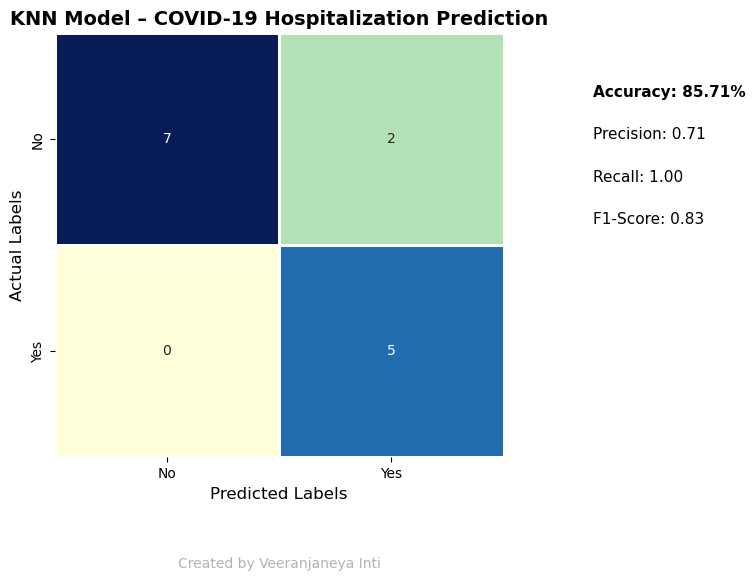

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# ✅ Recalculate confusion matrix and metrics (ensure y_test and y_test_pred exist)
cm = confusion_matrix(y_test, y_test_pred)
acc = accuracy_score(y_test, y_test_pred) * 100

# Get classification report as a dictionary for precision/recall/F1
report = classification_report(y_test, y_test_pred, output_dict=True)
precision = report['1']['precision']
recall = report['1']['recall']
f1 = report['1']['f1-score']

# 🎨 Create the figure
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linewidths=1)

# ✅ Add titles and labels
plt.title('KNN Model – COVID-19 Hospitalization Prediction', fontsize=14, weight='bold')
plt.xlabel('Predicted Labels', fontsize=12)
plt.ylabel('Actual Labels', fontsize=12)
plt.xticks([0.5, 1.5], ['No', 'Yes'])
plt.yticks([0.5, 1.5], ['No', 'Yes'])

# 🧾 Add text annotations (metrics)
plt.text(2.4, 0.3, f"Accuracy: {acc:.2f}%", fontsize=11, color='black', weight='bold')
plt.text(2.4, 0.5, f"Precision: {precision:.2f}", fontsize=11, color='black')
plt.text(2.4, 0.7, f"Recall: {recall:.2f}", fontsize=11, color='black')
plt.text(2.4, 0.9, f"F1-Score: {f1:.2f}", fontsize=11, color='black')

# 🪶 Watermark
plt.text(0.5, -0.25, 'Created by Veeranjaneya Inti', fontsize=10, color='gray', alpha=0.6,
         ha='center', va='center', transform=plt.gca().transAxes)

# 📸 Save and show
plt.tight_layout()
plt.savefig('KNN_COVID19_Hospitalization_Veeranjaneya_Inti.png', dpi=300, bbox_inches='tight')
plt.show()
